# 1. Definition
A **multi-class classification** is a *classification technique that allows us to categorize data* with **more than two class labels.**

**Logistic regression** is a statistical method used for **binary classification,** which predicts the probability that a given input belongs to **one of two possible categories.** When dealing with **multiclass classification,** where there are **more than two classes,** logistic regression can be extended using techniques such as:

### A. One-vs-Rest (OvR) or One-vs-All (OvA):
* This approach involves training a **separate binary classifier for each class.** <br>
* For **each classifier, one class is treated as the positive class,** and all **other classes are treated as the negative class.**
* During prediction, the **class with the highest probability** is chosen as the final prediction.

### B. Multinomial Logistic Regression:
* Also known as **Softmax Regression,** this approach generalizes logistic regression to handle multiple classes directly.
* Instead of using a **single sigmoid function,** it uses the **softmax function** to **predict the probabilities of each class.**
* The **softmax function** ensures that the **sum of the predicted probabilities for all classes is equal to 1.**


**Thanks To:**
* [Optical Recognition of Handwritten Digits](https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits)
* [*sklearn.datasets*.**load_digits**](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html)
* [Recognizing hand-written digits](https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html)

# 2. Import libraries

In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

# 3. Load dataset

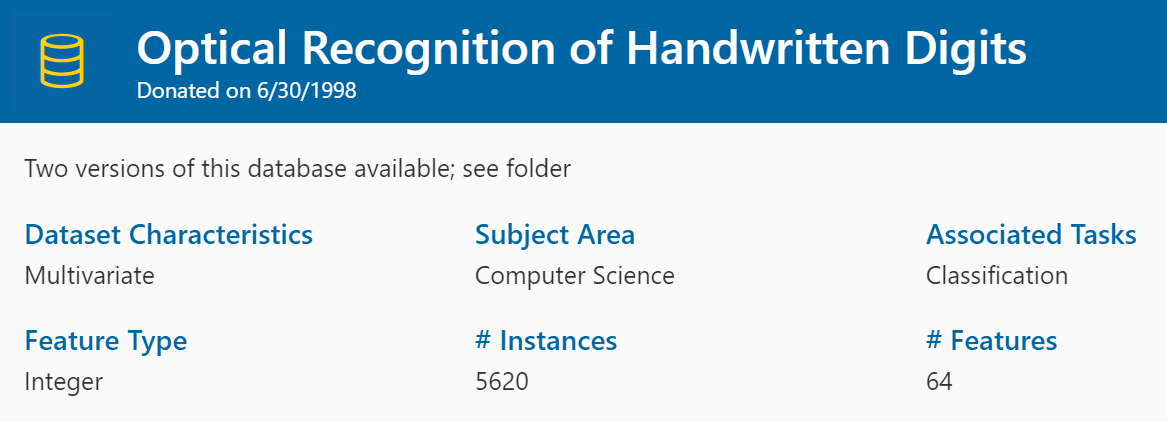

### Each datapoint is a 8x8 image of a digit.
##### from pixel_0_0 to pixel_0_7 like that
##### pixel_1_0 to pixel_1_7
#####. . .
##### pixel_7_0 to pixel_7_7

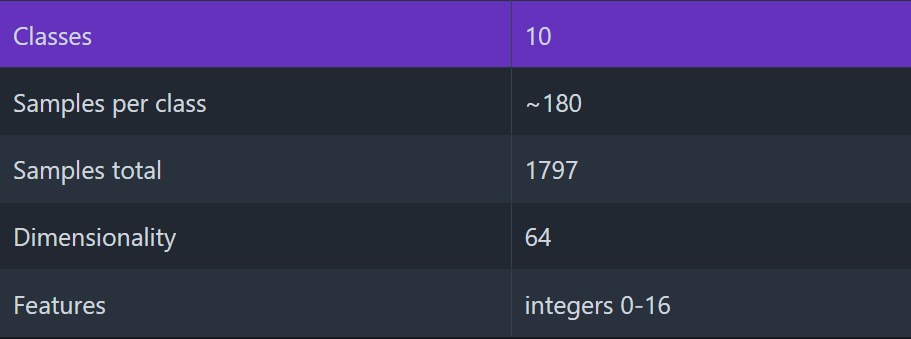

In [2]:
# load hand written digit dataset from sklearn library
digits = load_digits()
# read all the attributes of digit dataset
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

# 4. Dataset EDA (Exploratory Data Analysis)

In [3]:
# number of features int the digit dataset
len(digits.feature_names)

64

In [4]:
# feature's length of the dataset
len(digits.data)

1797

In [5]:
# target's length of the dataset
len(digits.target)

1797

In [6]:
# number of categories in the target
len(digits.target_names)

10

In [7]:
# different categories of the target
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# 5. Data Visualization

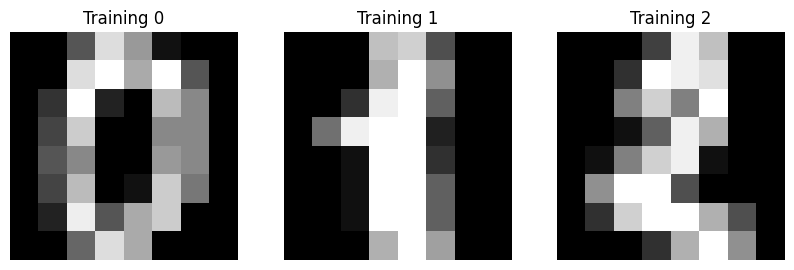

In [8]:
%matplotlib inline
# for i in range(3):
#   plt.matshow(digits.images[i])

_, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))

for ax, img, label in zip(ax, digits.images, digits.target):
  ax.set_axis_off()
  ax.imshow(img, cmap=plt.cm.gray, interpolation='nearest')
  ax.set_title("Training %i" % label)

In [9]:
# plt.gray()
# for i in range(3):
#   plt.matshow(digits.images[i])

In [10]:
# verify the first 3 target from digit dataset
digits.target[0:3]

array([0, 1, 2])

# 6. Split dataset into train and test data

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25)

In [13]:
len(X_train)

1347

In [14]:
len(X_test)

450

In [15]:
X_train[0:3]

array([[ 0.,  0.,  8., 16., 16., 11.,  0.,  0.,  0.,  0.,  4.,  8., 13.,
        14.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  8.,  0.,  0.,  0.,  0.,
         3., 12., 16.,  8.,  2.,  0.,  0.,  0.,  6., 16., 16., 16.,  9.,
         0.,  0.,  0.,  0., 14.,  8.,  2.,  0.,  0.,  0.,  0.,  3., 16.,
         1.,  0.,  0.,  0.,  0.,  0., 11., 12.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  5.,  0.,  0.,  0.,  0.,  0., 10., 16.,
         5.,  0.,  0.,  0.,  0.,  4., 16., 16.,  5.,  0.,  0.,  0., 11.,
        16., 16., 16.,  3.,  0.,  0.,  0.,  5.,  8., 14., 16.,  2.,  0.,
         0.,  0.,  0.,  0., 14., 16.,  2.,  0.,  0.,  0.,  0.,  0., 11.,
        16.,  2.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  8.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 15.,  1.,  0.,  0.,  0.,  0.,  0., 12., 14.,
         0.,  0.,  0.,  0.,  0.,  3., 16.,  7.,  0.,  0.,  0.,  0.,  0.,
         6., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  7., 16., 16., 13.,  5.,
         0.,  0.,  0., 15., 16.,  9.,  9., 14.,  0.,  0.,  

In [16]:
y_train[0:3]

array([7, 1, 6])

In [17]:
X_test[0:3]

array([[ 0.,  0.,  0.,  1., 13.,  7.,  0.,  0.,  0.,  0.,  0., 10., 14.,
         1.,  0.,  0.,  0.,  0.,  3., 16.,  5.,  0.,  0.,  0.,  0.,  0.,
        13., 11.,  0.,  3.,  8.,  0.,  0.,  6., 15.,  2.,  0., 14.,  7.,
         0.,  0.,  8., 16., 12., 13., 16.,  4.,  0.,  0.,  3., 11., 11.,
        15., 12.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  9., 16., 10.,  1.,  0.,  0.,  0.,  0.,  8.,  3., 16.,
         4.,  0.,  0.,  0.,  0.,  0.,  5., 14.,  2.,  0.,  0.,  0.,  0.,
         2., 16., 15.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  2.,
         0.,  0.,  4.,  6.,  0.,  0., 13.,  7.,  0.,  0.,  6., 13.,  1.,
         5., 16.,  3.,  0.,  0.,  0., 10., 16., 15.,  5.,  0.,  0.],
       [ 0.,  0.,  2., 13.,  1.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  6.,
         0.,  0.,  0.,  0.,  0.,  0., 15., 10.,  0.,  0.,  0.,  0.,  0.,
         0., 13., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  6., 15.,  6.,  0.,
         0.,  0.,  0.,  0.,  0., 12.,  9.,  0.,  0.,  0.,  

In [18]:
y_test[0:3]

array([4, 3, 1])

In [19]:
digits.data[0:3]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

In [20]:
digits.target[0:3]

array([0, 1, 2])

In [21]:
digits.target_names[0:3]

array([0, 1, 2])

In [22]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
model.predict(X_test)

array([4, 3, 1, 1, 7, 6, 0, 8, 6, 0, 2, 3, 5, 4, 7, 3, 2, 4, 2, 6, 0, 6,
       1, 0, 5, 3, 4, 8, 9, 5, 2, 4, 4, 6, 4, 6, 9, 5, 7, 0, 9, 8, 8, 5,
       0, 7, 5, 8, 4, 8, 1, 9, 0, 2, 8, 8, 5, 3, 8, 1, 6, 2, 9, 3, 2, 7,
       8, 6, 2, 8, 0, 6, 2, 7, 1, 1, 4, 2, 1, 5, 0, 0, 3, 6, 5, 5, 0, 2,
       2, 8, 4, 4, 2, 3, 9, 9, 0, 3, 3, 9, 2, 7, 7, 2, 9, 4, 9, 5, 0, 1,
       8, 6, 8, 8, 9, 6, 9, 3, 7, 6, 6, 7, 2, 6, 9, 7, 6, 9, 3, 9, 6, 3,
       1, 8, 6, 2, 7, 6, 3, 7, 8, 9, 7, 4, 1, 8, 5, 5, 1, 0, 4, 5, 4, 3,
       4, 3, 3, 6, 2, 4, 7, 9, 5, 9, 6, 9, 6, 2, 5, 0, 3, 0, 2, 4, 0, 9,
       2, 7, 0, 4, 5, 5, 9, 5, 0, 5, 8, 1, 7, 1, 0, 4, 4, 5, 2, 7, 1, 8,
       6, 6, 3, 9, 0, 8, 5, 7, 2, 0, 9, 4, 0, 7, 2, 9, 9, 9, 6, 4, 6, 1,
       0, 4, 5, 4, 6, 0, 5, 4, 6, 7, 7, 6, 7, 5, 8, 7, 2, 8, 8, 4, 3, 8,
       7, 4, 5, 6, 3, 0, 5, 3, 5, 8, 0, 8, 0, 1, 8, 5, 9, 5, 9, 3, 0, 8,
       6, 1, 0, 4, 4, 5, 5, 2, 0, 7, 4, 5, 4, 9, 8, 2, 6, 8, 7, 3, 1, 5,
       3, 5, 2, 8, 5, 5, 1, 4, 5, 3, 9, 8, 8, 9, 8,

In [24]:
model.score(X_test, y_test)

0.9622222222222222

In [25]:
model.predict([digits.data[2]])

array([2])

In [26]:
model.predict(digits.data[0:3])

array([0, 1, 2])

In [27]:
y_pred = model.predict(X_test)

# Confusion matrix

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[55,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 35,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 43,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 35,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 42,  0,  0,  1,  0,  0],
       [ 0,  0,  1,  0,  0, 46,  1,  1,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 45,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 40,  0,  1],
       [ 0,  3,  0,  0,  0,  1,  0,  0, 46,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  2, 46]])

In [30]:
import seaborn as sb

Text(95.72222222222221, 0.5, 'True')

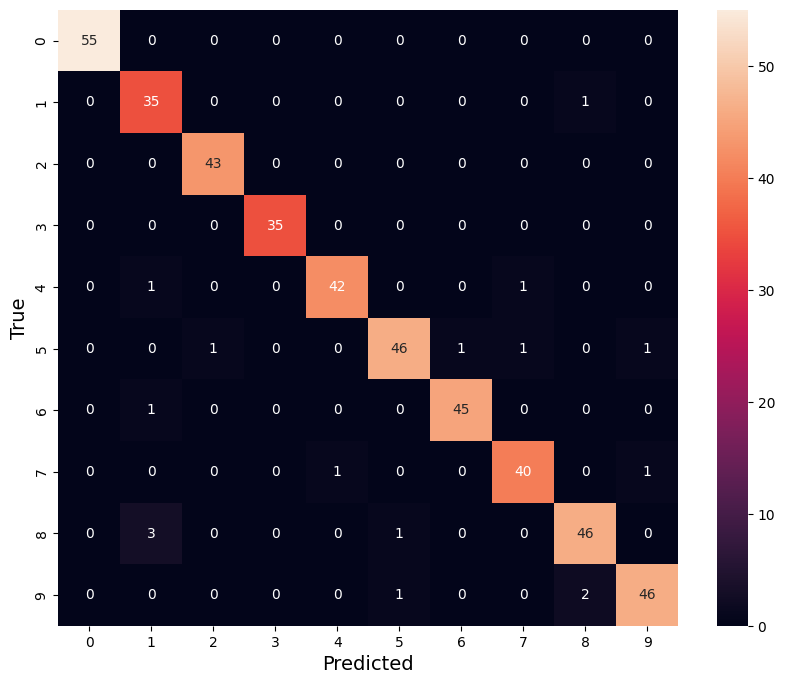

In [31]:
plt.figure(figsize=(10, 8))
sb.heatmap(cm, annot=True)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('True', fontsize=14)